In [1]:
import pandas as pd
from h5py import File as H5File
from scipy.interpolate import interp1d 
import numpy as np
import sys
from os import remove

In [120]:
import matplotlib.pylab as plt
from scipy.signal import medfilt

with H5File("new_data-2.h5", "r")  as fp:
    data =  fp["10"]["346"][:1000000]

In [ ]:
idh = medfilt(data[:,1], 1001)
vdh = medfilt(data[:,2], 1001)

In [122]:
# very quick and dirty
idh = idh - np.mean(idh)
vdh = vdh - np.mean(vdh)

In [125]:
import statsmodels.tsa.stattools as ts
coin_result = ts.coint(idh, vdh) 

In [126]:
print (coin_result)

(-20.54378074056914, 0.0, array([-3.89645095, -3.33613611, -3.04445424]))


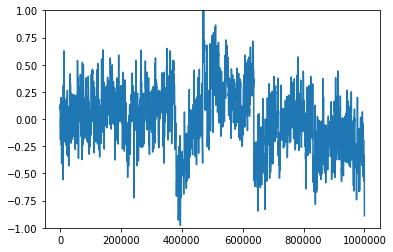

In [127]:
plt.plot(vdh)
plt.ylim([-1,1])
plt.show()


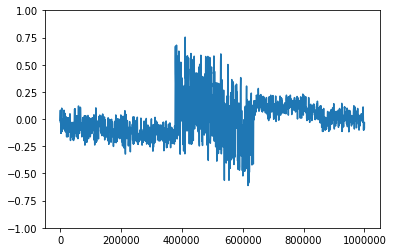

In [128]:
plt.plot(idh)
plt.ylim([-1,1])
plt.show()


In [133]:
# test seems 
coef = vdh.dot(vdh)/vdh.dot(idh)
resid = idh - coef * vdh

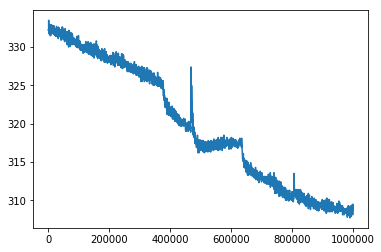

In [136]:
pinp = data[:,4]
plt.plot(pinp)
plt.show()

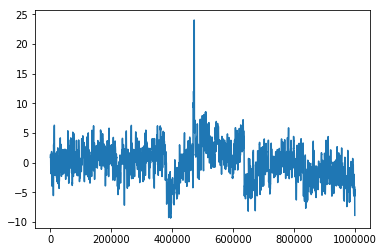

In [137]:
plt.plot(resid)
plt.show()

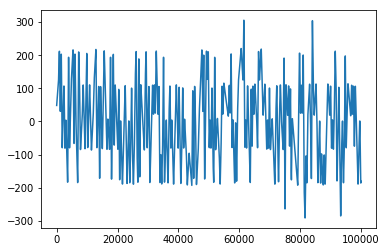

In [103]:
plt.plot(resid)
plt.show()

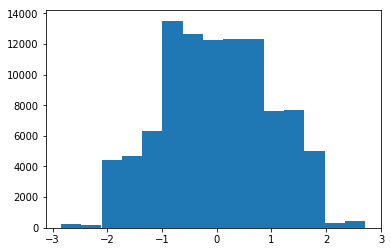

-0.019571467987540576 -0.6422212217982786


In [99]:
plt.hist(resid/np.std(resid), 15)
plt.show()

from scipy.stats import skew, kurtosis

print(skew(resid), kurtosis(resid))

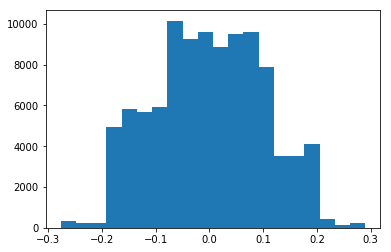

In [100]:
plt.hist(idh, 20)
plt.show()

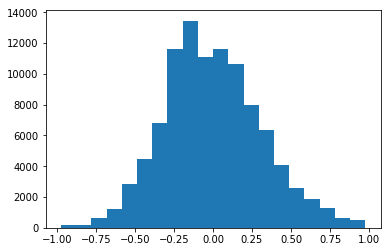

In [101]:
plt.hist(vdh, 20)
plt.show()